# Goal

To produce a file which contains all collaborative relationships between coauthors. I have ~75k publications from our 1041 CHW authors, where each publication contains a list of coauthors.

I need to get all pairwise relationships between the coauthors and a list of all unique CHW authors.

In [3]:
import numpy as np
import pandas as pd
import utils.misc as um
import itertools

In [6]:
df = pd.read_csv('pca_scores_author_profiles_Jan_13_2022.csv', index_col=0)

# df = df_auths[df_auths['affil'] == 'ACHRI']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 1 to 2219
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Auid                        2219 non-null   int64  
 1   mean_citations_per_year     2219 non-null   float64
 2   citation_count              2219 non-null   int64  
 3   cited_by_count              2219 non-null   int64  
 4   coauthor_count              2219 non-null   int64  
 5   document_count              2219 non-null   int64  
 6   h_index                     2219 non-null   int64  
 7   affil                       2219 non-null   object 
 8   publication_duration        2219 non-null   int64  
 9   growth_rate                 2219 non-null   float64
 10  openaccess_sum              2219 non-null   int64  
 11  Article_sum                 2219 non-null   int64  
 12  SJR_median                  2219 non-null   float64
 13  journal_h_index_median      2219 

,Auid,mean_citations_per_year,citation_count,cited_by_count,coauthor_count,document_count,h_index,affil,publication_duration,growth_rate,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
1,6603220065,74.000000,1038,800,239,168,18,WCHRI,17,72.818182,...,0.221122,1.123158,0.211654,-0.292701,-0.543587,0.024349,0.107306,-0.011993,0.079387,2.237644e-07
2,7007033627,190.090909,3837,2552,476,166,35,WCHRI,25,180.454545,...,-0.816002,0.623170,-0.125509,-0.098939,-0.515083,-0.044537,0.138507,0.077790,-0.030936,-4.435738e-07
3,16688012700,19.000000,1702,1361,66,65,23,WCHRI,29,20.900000,...,-0.468108,0.077891,1.098585,0.100678,-0.059686,0.145372,-0.019012,-0.001155,-0.003881,3.404285e-07
4,12902675100,23.545455,287,170,76,46,9,WCHRI,11,19.363636,...,0.973045,0.561212,0.278263,-0.504546,-0.109114,0.023592,0.086455,0.115082,0.006006,2.779413e-07
5,55366878700,133.454545,1643,1273,438,128,24,WCHRI,18,122.454545,...,0.263354,1.353320,0.037003,0.157407,-0.189176,-0.084490,-0.205980,0.038913,0.030910,2.876602e-07


In [8]:
# standardize PC1 scores to unit interval
df['PC1_norm'] = (df['PC1'] - df['PC1'].min())/(df['PC1'].max() - df['PC1'].min())

# rename Auid for Gephi
df.rename(columns={'Auid': 'Id'}, inplace=True)

# get nodes
nodes = df[['Id', 'affil', 'PC1', 'PC1_norm']]
nodes.to_excel('../graph_nodes_jan13.xlsx', index=False)

In [9]:
nodes.to_excel('~/OneDrive/collab/Datasets/graph_nodes_jan13.xlsx', index=False)

# Examining the top PC1 researchers

Who are the researchers with highest PC1 scores?

In [15]:
q = .975
qtile = df['PC1'].quantile(q=q)

top_q = df[df['PC1'] >= qtile]
top_q

,Id,mean_citations_per_year,citation_count,cited_by_count,coauthor_count,document_count,h_index,affil,publication_duration,growth_rate,...,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC1_norm
20,7006668487,1504.545455,27439,14392,903,346,73,WCHRI,38,1027.272727,...,-1.191267,0.085895,0.058697,0.728484,0.073062,-0.278413,0.024193,0.015346,1.946563e-06,0.771167
94,55557546600,1.363636,15,15,32,7,1,WCHRI,9,1.875000,...,-0.412434,-0.474628,-0.037138,-0.020350,0.104919,-0.014727,-0.001971,-0.003050,-1.249891e-07,0.528082
133,6603484891,0.272727,19,19,23,5,1,WCHRI,19,0.300000,...,-1.358010,0.060097,0.134877,-0.041544,0.104422,-0.045714,0.024233,-0.003024,1.024615e-06,0.532708
152,36166841600,4.000000,33,25,32,18,4,WCHRI,11,3.909091,...,0.251212,0.052409,-0.203249,0.284316,0.179486,0.013343,0.006132,0.006128,4.491323e-07,0.559883
158,57201396230,1.454545,8,8,35,5,2,WCHRI,3,4.000000,...,0.005679,-0.736326,-0.031888,0.000914,0.104227,-0.011150,-0.003579,0.000100,4.408305e-07,0.532550
159,57205740828,0.272727,1,1,32,3,1,WCHRI,2,1.000000,...,0.153628,-0.904620,-0.102630,-0.068140,0.105777,-0.016814,-0.007056,-0.001932,2.878004e-07,0.526193
162,57194834057,3.000000,26,25,13,11,2,WCHRI,4,5.500000,...,0.671404,0.320274,0.054510,0.187830,0.100563,0.014621,-0.015886,0.014405,4.510183e-07,0.528560
177,56427897500,3.181818,7,7,10,3,1,WCHRI,7,4.375000,...,-0.599213,-0.209606,0.036271,-0.013170,0.042961,-0.001189,0.009842,-0.005806,8.264721e-07,0.589732
209,6505463581,6.636364,72,64,48,28,5,WCHRI,19,6.545455,...,0.240484,0.262568,-0.342214,-0.050110,0.138546,-0.097307,-0.016841,0.009175,6.789935e-07,0.535729
211,55651805700,1.909091,13,13,13,7,2,WCHRI,8,2.333333,...,-0.434313,0.077451,-0.172913,-0.080725,0.068820,0.004477,-0.005559,-0.002454,7.254815e-07,0.529693


In [16]:
top_q.groupby('affil').count()

,Id,mean_citations_per_year,citation_count,cited_by_count,coauthor_count,document_count,h_index,publication_duration,growth_rate,openaccess_sum,...,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC1_norm
affil,,,,,,,,,,,,,,,,,,,,,
ACHRI,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
BCCHR,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
CHRIM,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
CHUSJ,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
McMaster,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
Sickkids,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
WCHRI,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [21]:
# df_auth = pd.read_excel("~/OneDrive/collab/Datasets/PCA_inputs_jan11.xlsx")
df_profiles = pd.read_json("../chw_author_profiles_jan12.json")

df_profiles.info()
df_profiles.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2493 entries, 0 to 2492
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Auid                     2493 non-null   int64  
 1   filled_cum_citations     2493 non-null   object 
 2   mean_citations_per_year  2493 non-null   float64
 3   citation_count           2493 non-null   int64  
 4   cited_by_count           2493 non-null   int64  
 5   coauthor_count           2493 non-null   int64  
 6   classificationgroup      2493 non-null   object 
 7   document_count           2493 non-null   int64  
 8   given_name               2493 non-null   object 
 9   h_index                  2493 non-null   int64  
 10  indexed_name             2493 non-null   object 
 11  publication_range        2493 non-null   object 
 12  subject_areas            2493 non-null   object 
 13  surname                  2493 non-null   object 
dtypes: float64(1), int64(6),

,Auid,filled_cum_citations,mean_citations_per_year,citation_count,cited_by_count,coauthor_count,classificationgroup,document_count,given_name,h_index,indexed_name,publication_range,subject_areas,surname
0,6603220065,"[13.0, 106.0, 214.0, 346.0, 443.0, 561.0, 622....",74.000000,1038,800,239,"[(2737, 2), (2102, 4), (2300, 1), (3504, 2), (...",168,Samer M.,18,Adeeb S.,"(2004, 2021)","[Subjectarea(area='Physiology (medical)', abbr...",Adeeb
1,7007033627,"[106.0, 206.0, 494.0, 707.0, 902.0, 1423.0, 17...",190.090909,3837,2552,476,"[(1303, 11), (2720, 71), (2507, 1), (1602, 1),...",166,Jason P.,35,Acker J.,"(1996, 2021)","[Subjectarea(area='Biochemistry', abbreviation...",Acker
2,16688012700,"[0.0, 64.0, 64.0, 98.0, 101.0, 122.0, 128.0, 1...",19.000000,1702,1361,66,"[(2400, 5), (2721, 1), (1101, 1), (3003, 8), (...",65,Babita,23,Agrawal B.,"(1991, 2020)",[Subjectarea(area='Immunology and Microbiology...,Agrawal
3,12902675100,"[46.0, 59.0, 79.0, 114.0, 121.0, 160.0, 232.0,...",23.545455,287,170,76,"[(1709, 4), (1702, 7), (3319, 1), (2735, 2), (...",46,Kim D.,9,Adams K.,"(2009, 2020)",[Subjectarea(area='Human-Computer Interaction'...,Adams
4,55366878700,"[121.0, 249.0, 386.0, 644.0, 777.0, 896.0, 114...",133.454545,1643,1273,438,"[(2908, 1), (2406, 2), (1313, 2), (2614, 1), (...",128,Samina,24,Ali S.,"(2003, 2021)","[Subjectarea(area='Fundamentals and Skills', a...",Ali


In [30]:
df_top = top_q.merge(df_profiles, left_on='Id', right_on='Auid', how='inner')
df_top = df_top[['Auid', 'indexed_name', 'given_name', 'PC1_norm', 'affil', 'coauthor_count_x', 'cited_by_count_x', 'publication_duration', 'growth_rate']]
df_top

,Auid,indexed_name,given_name,PC1_norm,affil,coauthor_count_x,cited_by_count_x,publication_duration,growth_rate
0,7006668487,Baracos V.,V. Elaine,0.771167,WCHRI,903,14392,38,1027.272727
1,55557546600,Foulds J.,Jessica L.,0.528082,WCHRI,32,15,9,1.875000
2,6603484891,Islam B.,Bonnieca F.,0.532708,WCHRI,23,19,19,0.300000
3,36166841600,Kleib M.,Manal,0.559883,WCHRI,32,25,11,3.909091
4,57201396230,Ladha T.,Tehseen,0.532550,WCHRI,35,8,3,4.000000
5,57205740828,Kumaran K.,Kumar,0.526193,WCHRI,32,1,2,1.000000
6,57194834057,Law B.,Brenda Hiu Yan,0.528560,WCHRI,13,25,4,5.500000
7,56427897500,Macala K.,Kimberly F.,0.589732,WCHRI,10,7,7,4.375000
8,6505463581,Okeke-Ihejirika P.,Philomina E.,0.535729,WCHRI,48,64,19,6.545455
9,55651805700,O'Rourke T.,Tammy,0.529693,WCHRI,13,13,8,2.333333


In [33]:
df_top[df_top['affil'] == 'ACHRI']

,Auid,indexed_name,given_name,PC1_norm,affil,coauthor_count_x,cited_by_count_x,publication_duration,growth_rate
19,15846630900,Sandhu A.,Amonpreet K.,0.524118,ACHRI,22,12,8,0.727273
25,36099630800,Metzler M.,Megan J.,0.535388,ACHRI,20,10,3,4.750000
37,56985519800,Barnard C.,Chantelle,0.589147,ACHRI,9,12,16,3.166667


# Build the graph edges

In [17]:
df_pubs = pd.read_csv('../Datasets/chw_publications.csv')
df_pubs.info()
print(df_pubs.columns[:25])
df_pubs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219997 entries, 0 to 219996
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CHW author           219997 non-null  int64  
 1   eid                  219997 non-null  object 
 2   doi                  205160 non-null  object 
 3   pii                  59958 non-null   object 
 4   pubmed_id            179365 non-null  float64
 5   title                219989 non-null  object 
 6   subtype              219997 non-null  object 
 7   subtypeDescription   219913 non-null  object 
 8   creator              219890 non-null  object 
 9   afid                 213954 non-null  object 
 10  affilname            213954 non-null  object 
 11  affiliation_city     213608 non-null  object 
 12  affiliation_country  213908 non-null  object 
 13  author_count         219929 non-null  float64
 14  author_names         219929 non-null  object 
 15  author_ids       

,CHW author,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,...,issueIdentifier,article_number,pageRange,description,authkeywords,citedby_count,openaccess,fund_acr,fund_no,fund_sponsor
0,6503856044,2-s2.0-85102936784,10.1177/10935266211001986,NaN,33749384.0,Histologic Correlates of Molecular Group 4 Ped...,re,Review,Triscott J.,60193402;60023077;60020486;60018471;60010365;1...,...,4,NaN,309-317,Introduction: The World Health Organization cu...,biphasic | histology | molecular subtypes | Na...,1,0,MSFHR,undefined,Hannah's Heroes Foundation
1,6503856044,2-s2.0-85108228079,10.2217/pme-2020-0120,NaN,33973801.0,Deliberations about clinical pharmacogenetic t...,re,Review,Issa A.M.,60191838;60086967;60030835;60029502;60026553;6...,...,4,NaN,399-405,"This article summarizes the background, conten...",adverse reactions | deliberative consultation ...,0,0,CIHR,1-155872,Genome Canada
2,6503856044,2-s2.0-85104934944,10.1002/cam4.3910,NaN,33939292.0,Trametinib therapy for children with neurofibr...,ar,Article,Ronsley R.,60023077;60010365,...,11,NaN,3556-3564,Purpose: To describe a series of children with...,low-grade glioma | neurofibromatosis | pediatr...,1,1,NaN,undefined,NaN
3,6503856044,2-s2.0-85109755328,10.9778/cmajo.20200212,NaN,34021014.0,Family attitudes about and experiences with me...,ar,Article,Gibbard M.,60086967,...,2,NaN,E563-E569,BACKGROUND: Cannabis is legal for recreational...,NaN,2,1,NaN,undefined,NaN
4,6503856044,2-s2.0-85101694285,10.1016/S2352-4642(21)00020-1,S2352464221000201,33581749.0,Prevalence and risk factors for cisplatin-indu...,ar,Article,Moke D.J.,60086967;60030769;60029311;60023077;60020565;6...,...,4,NaN,274-283,Background: Cisplatin is used to treat a wide ...,NaN,5,0,NIH,P30CA014089,National Institutes of Health


In [18]:
# get only publications after 2015
df_pubs['Year'] = df_pubs['coverDate'].str.extract('^([0-9]*)-')

df_pubs['Year'] = df_pubs['Year'].apply(int)

df_pubs = df_pubs[df_pubs['Year'] >= 2015]
df_pubs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91275 entries, 0 to 219996
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CHW author           91275 non-null  int64  
 1   eid                  91275 non-null  object 
 2   doi                  89853 non-null  object 
 3   pii                  23237 non-null  object 
 4   pubmed_id            74310 non-null  float64
 5   title                91274 non-null  object 
 6   subtype              91275 non-null  object 
 7   subtypeDescription   91193 non-null  object 
 8   creator              91205 non-null  object 
 9   afid                 89754 non-null  object 
 10  affilname            89754 non-null  object 
 11  affiliation_city     89693 non-null  object 
 12  affiliation_country  89743 non-null  object 
 13  author_count         91240 non-null  float64
 14  author_names         91240 non-null  object 
 15  author_ids           91240 non-null

In [19]:
def convert_to_int(x):
    """ Take x, possibly a list, and convert to int """
    try:
        if isinstance(x, list):
            return [int(i) for i in x]
        elif np.isnan(x):
            return 0
        else:
            return int(x)
        
    except:
        raise

In [20]:
df_pubs.loc[:, 'auids'] = df_pubs.loc[:, 'author_ids'].str.split(';')

# remove any missing rows
df_pubs = df_pubs[~df_pubs.author_ids.isna()]

# convert auids to int
df_pubs['auids'] = df_pubs['auids'].apply(um.convert_to_int)

In [21]:
# get the chw author positions - come back to see the ones not found in their own author lists
not_found = []

for i in df_pubs.index:
    try:
        df_pubs.loc[i, 'chw_author_position'] = df_pubs.loc[i, 'auids'].index(df_pubs.loc[i, 'CHW author'])
    except ValueError:
        not_found.append(i)
        
print('{} authors not found in their own author lists\n'.format(len(not_found)))

df_pubs.head()

783 authors not found in their own author lists



,CHW author,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,...,description,authkeywords,citedby_count,openaccess,fund_acr,fund_no,fund_sponsor,Year,auids,chw_author_position
0,6503856044,2-s2.0-85102936784,10.1177/10935266211001986,NaN,33749384.0,Histologic Correlates of Molecular Group 4 Ped...,re,Review,Triscott J.,60193402;60023077;60020486;60018471;60010365;1...,...,Introduction: The World Health Organization cu...,biphasic | histology | molecular subtypes | Na...,1,0,MSFHR,undefined,Hannah's Heroes Foundation,2021,"[53882034800, 7102134322, 7403550284, 71018199...",4.0
1,6503856044,2-s2.0-85108228079,10.2217/pme-2020-0120,NaN,33973801.0,Deliberations about clinical pharmacogenetic t...,re,Review,Issa A.M.,60191838;60086967;60030835;60029502;60026553;6...,...,"This article summarizes the background, conten...",adverse reactions | deliberative consultation ...,0,0,CIHR,1-155872,Genome Canada,2021,"[7006615788, 57200159420, 6603414671, 36980983...",5.0
2,6503856044,2-s2.0-85104934944,10.1002/cam4.3910,NaN,33939292.0,Trametinib therapy for children with neurofibr...,ar,Article,Ronsley R.,60023077;60010365,...,Purpose: To describe a series of children with...,low-grade glioma | neurofibromatosis | pediatr...,1,1,NaN,undefined,NaN,2021,"[35272975600, 57204041913, 54388707200, 650385...",3.0
3,6503856044,2-s2.0-85109755328,10.9778/cmajo.20200212,NaN,34021014.0,Family attitudes about and experiences with me...,ar,Article,Gibbard M.,60086967,...,BACKGROUND: Cannabis is legal for recreational...,NaN,2,1,NaN,undefined,NaN,2021,"[57224506700, 57209177557, 6503856044, 6506014...",2.0
4,6503856044,2-s2.0-85101694285,10.1016/S2352-4642(21)00020-1,S2352464221000201,33581749.0,Prevalence and risk factors for cisplatin-indu...,ar,Article,Moke D.J.,60086967;60030769;60029311;60023077;60020565;6...,...,Background: Cisplatin is used to treat a wide ...,NaN,5,0,NIH,P30CA014089,National Institutes of Health,2021,"[57194505277, 57205079186, 24367129900, 162306...",4.0


In [22]:
# reduce the number of columns
df2 = df_pubs[['CHW author', 'eid', 'citedby_count', 'auids', 'chw_author_position', 'Year']]
df2

,CHW author,eid,citedby_count,auids,chw_author_position,Year
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021
1,6503856044,2-s2.0-85108228079,0,"[7006615788, 57200159420, 6603414671, 36980983...",5.0,2021
2,6503856044,2-s2.0-85104934944,1,"[35272975600, 57204041913, 54388707200, 650385...",3.0,2021
3,6503856044,2-s2.0-85109755328,2,"[57224506700, 57209177557, 6503856044, 6506014...",2.0,2021
4,6503856044,2-s2.0-85101694285,5,"[57194505277, 57205079186, 24367129900, 162306...",4.0,2021
...,...,...,...,...,...,...
219992,57220999344,2-s2.0-85097982774,1,"[55062176700, 56568449600, 56037870400, 572021...",4.0,2021
219993,57226726716,2-s2.0-85112413672,0,"[57225302207, 56196397400, 57226709101, 571893...",5.0,2021
219994,57241564300,2-s2.0-85100438652,0,"[35739201900, 57241564300]",1.0,2021
219995,57249145700,2-s2.0-85114437047,0,"[57220589090, 57218249433, 55192953600, 572491...",3.0,2021


In [23]:
# get the positions of each author in the list of auids
df2['coauthor_position'] = df2['auids'].apply(lambda x: list(enumerate(x)))
df2

/home/matt/anaconda3/envs/main/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CHW author,eid,citedby_count,auids,chw_author_position,Year,coauthor_position
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021,"[(0, 53882034800), (1, 7102134322), (2, 740355..."
1,6503856044,2-s2.0-85108228079,0,"[7006615788, 57200159420, 6603414671, 36980983...",5.0,2021,"[(0, 7006615788), (1, 57200159420), (2, 660341..."
2,6503856044,2-s2.0-85104934944,1,"[35272975600, 57204041913, 54388707200, 650385...",3.0,2021,"[(0, 35272975600), (1, 57204041913), (2, 54388..."
3,6503856044,2-s2.0-85109755328,2,"[57224506700, 57209177557, 6503856044, 6506014...",2.0,2021,"[(0, 57224506700), (1, 57209177557), (2, 65038..."
4,6503856044,2-s2.0-85101694285,5,"[57194505277, 57205079186, 24367129900, 162306...",4.0,2021,"[(0, 57194505277), (1, 57205079186), (2, 24367..."
...,...,...,...,...,...,...,...
219992,57220999344,2-s2.0-85097982774,1,"[55062176700, 56568449600, 56037870400, 572021...",4.0,2021,"[(0, 55062176700), (1, 56568449600), (2, 56037..."
219993,57226726716,2-s2.0-85112413672,0,"[57225302207, 56196397400, 57226709101, 571893...",5.0,2021,"[(0, 57225302207), (1, 56196397400), (2, 57226..."
219994,57241564300,2-s2.0-85100438652,0,"[35739201900, 57241564300]",1.0,2021,"[(0, 35739201900), (1, 57241564300)]"
219995,57249145700,2-s2.0-85114437047,0,"[57220589090, 57218249433, 55192953600, 572491...",3.0,2021,"[(0, 57220589090), (1, 57218249433), (2, 55192..."


In [24]:
# explode the 'coauthor_position' column
df2 = df2.explode('coauthor_position')
df2.head()

,CHW author,eid,citedby_count,auids,chw_author_position,Year,coauthor_position
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021,"(0, 53882034800)"
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021,"(1, 7102134322)"
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021,"(2, 7403550284)"
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021,"(3, 7101819941)"
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021,"(4, 6503856044)"


In [25]:
# get the coauthor positions and auids
df2['Target_position'] = df2['coauthor_position'].apply(lambda x: x[0])
df2['Target'] = df2['coauthor_position'].apply(lambda x: x[1])
df2.head()

,CHW author,eid,citedby_count,auids,chw_author_position,Year,coauthor_position,Target_position,Target
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021,"(0, 53882034800)",0,53882034800
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021,"(1, 7102134322)",1,7102134322
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021,"(2, 7403550284)",2,7403550284
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021,"(3, 7101819941)",3,7101819941
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021,"(4, 6503856044)",4,6503856044


In [26]:
# find the distance between authors
df2['coauthor_distance'] = np.abs(df2['chw_author_position'] - df2['Target_position'])
df2.head()

,CHW author,eid,citedby_count,auids,chw_author_position,Year,coauthor_position,Target_position,Target,coauthor_distance
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021,"(0, 53882034800)",0,53882034800,4.0
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021,"(1, 7102134322)",1,7102134322,3.0
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021,"(2, 7403550284)",2,7403550284,2.0
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021,"(3, 7101819941)",3,7101819941,1.0
0,6503856044,2-s2.0-85102936784,1,"[53882034800, 7102134322, 7403550284, 71018199...",4.0,2021,"(4, 6503856044)",4,6503856044,0.0


In [27]:
# reset the index
df2.reset_index(drop=True, inplace=True)

# rename the 'CHW author' column
df2.rename(
    columns = {
        'CHW author': 'Source'
    },
    inplace = True
)

In [28]:
# drop the unused columns
edges = df2.drop(
    [
        'auids',
        'chw_author_position',
        'coauthor_position',
        'Target_position',
        'eid'
    ],
    axis = 1
)

In [29]:
edges

,Source,citedby_count,Year,Target,coauthor_distance
0,6503856044,1,2021,53882034800,4.0
1,6503856044,1,2021,7102134322,3.0
2,6503856044,1,2021,7403550284,2.0
3,6503856044,1,2021,7101819941,1.0
4,6503856044,1,2021,6503856044,0.0
...,...,...,...,...,...
1108154,57283733600,0,2021,57284830400,2.0
1108155,57283733600,0,2021,57193198855,3.0
1108156,57283733600,0,2021,7102290275,4.0
1108157,57283733600,0,2021,7401509446,5.0


In [30]:
# reorder the columns
edges = edges[['Source', 'Target', 'citedby_count', 'coauthor_distance', 'Year']]

# take out self-connections
edges = edges[edges['Source'] != edges['Target']]

# transform the skewed columns
# edges['log_citations'] = edges['citedby_count'].apply(lambda x: np.log(x + 1))
# edges['log_distance'] = edges['coauthor_distance'].apply(lambda x: np.log(x + 1))

# get edge weights - using a Gaussian for now
# sigma = 1
# edges['Weight'] = np.exp(-(edges['log_distance']**2/sigma))*edges['log_citations']
edges.head()

,Source,Target,citedby_count,coauthor_distance,Year
0,6503856044,53882034800,1,4.0,2021
1,6503856044,7102134322,1,3.0,2021
2,6503856044,7403550284,1,2.0,2021
3,6503856044,7101819941,1,1.0,2021
5,6503856044,6603195101,1,1.0,2021


In [30]:
# normalize weights to interval (0,1)
# edges['Weight'] = (edges['Weight'] - edges['Weight'].min())/(edges['Weight'].max() - edges['Weight'].min())

/home/matt/anaconda3/envs/main/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


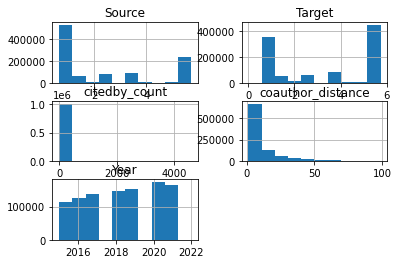

In [31]:
edges.hist();

In [32]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218 entries, 1 to 2218
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2218 non-null   int64  
 1   affil     2218 non-null   object 
 2   PC1       2218 non-null   float64
 3   PC1_norm  2218 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 86.6+ KB


In [33]:
df3 = pd.merge(edges, nodes, left_on = 'Source', right_on = 'Id').drop('Id', axis = 1)
df3

,Source,Target,citedby_count,coauthor_distance,Year,affil,PC1,PC1_norm
0,6503856044,53882034800,1,4.0,2021,BCCHR,-0.373709,0.284834
1,6503856044,7102134322,1,3.0,2021,BCCHR,-0.373709,0.284834
2,6503856044,7403550284,1,2.0,2021,BCCHR,-0.373709,0.284834
3,6503856044,7101819941,1,1.0,2021,BCCHR,-0.373709,0.284834
4,6503856044,6603195101,1,1.0,2021,BCCHR,-0.373709,0.284834
...,...,...,...,...,...,...,...,...
869915,57283733600,57284830400,0,2.0,2021,McMaster,1.471465,0.398918
869916,57283733600,57193198855,0,3.0,2021,McMaster,1.471465,0.398918
869917,57283733600,7102290275,0,4.0,2021,McMaster,1.471465,0.398918
869918,57283733600,7401509446,0,5.0,2021,McMaster,1.471465,0.398918


In [35]:
df3.rename(columns={'affil': 'Label'}, inplace=True)

# Custom edge weight function

After looking at various functions to weight the graph edges based on `citedby_count` and `coauthor_distance`, I've found a decent function that appears to be representative. Let $c$ be the number of citing documents for a collaboration and $d$ be the $L_1$ distance between coauthors. Then the edge weight is given by
$$
    w(c,d) = \frac{\log_{10}(c+1)}{\sqrt{d}} + 1.
$$

In [41]:
# apply the custom edge weights
df3['Weight'] = np.log10(df3['citedby_count'] + 1)/np.sqrt(df3['coauthor_distance']) + 1
df3.head()

,Source,Target,citedby_count,coauthor_distance,Year,Label,PC1,PC1_norm,Weight
0,6503856044,53882034800,1,4.0,2021,BCCHR,-0.373709,0.284834,1.150515
1,6503856044,7102134322,1,3.0,2021,BCCHR,-0.373709,0.284834,1.173800
2,6503856044,7403550284,1,2.0,2021,BCCHR,-0.373709,0.284834,1.212860
3,6503856044,7101819941,1,1.0,2021,BCCHR,-0.373709,0.284834,1.301030
4,6503856044,6603195101,1,1.0,2021,BCCHR,-0.373709,0.284834,1.301030


In [42]:
df3['Weight'].describe()

count    813213.000000
mean          1.441416
std           0.385912
min           1.000000
25%           1.169375
50%           1.353553
75%           1.615224
max           4.662852
Name: Weight, dtype: float64

In [43]:
df3.to_csv('../Datasets/graph_edges_jan12.csv', index = False)